# Homework 6   (100 pt)


In [48]:
# import the library
import numpy as np
import numpy.random as npr
import random
import itertools
import pandas as pdf
import scipy.stats as stats
import matplotlib.pyplot as plt
import  math


# Problem 1 (20 pt)

Leukemia is a type of cancer found in the blood and bone marrow and is caused by the rapid production of abnormal white blood cells (leukocytes). These abnormal white blood cells are not able to fight infection and impair the ability of the bone marrow to produce red blood cells and platelets.

Suppose that leukocytes cell count for people without Leukemia/cancer ($H_0$) can be approximately modeled with a $\operatorname{Gaussian}(\mu=8, \sigma^2=5)$ and leukocytes cell count for people with Leukemia/cancer ($H_1$) are approximately $\operatorname{Gaussian}(\mu=14, \sigma^2=6)$.

The following decision rule is used:

* Decide $H_0$ if $x \le \gamma$.
* Decide $H_1$ if $x > \gamma$. 

Answer the following questions:

1. (5 points) Determine the threshold $\gamma$ for the leukocytes cell count such that the probability of a miss is 5%.

In [67]:
# Parameters for H1
averageH1 = 14
stdH1 = math.sqrt(6)

H1 = stats.norm(loc=averageH1, scale = stdH1)
gamma = H1.isf(1- 0.05)

print(gamma)

9.97094791240266


 2. (5 points) What is the probability of false alarm using the threshold value $\gamma$ found in part (1).

In [66]:
# Parameters for H0
averageH0 = 8
stdH0 = math.sqrt(5)

H0 = stats.norm(loc=averageH0, scale = stdH0)
gammaFalseAlarm = H0.sf(gamma)

print(gammaFalseAlarm)

0.18904129092005645


3. (5 points) Plot the ROC curve and compute the AUC.

(0.0, 1.0)

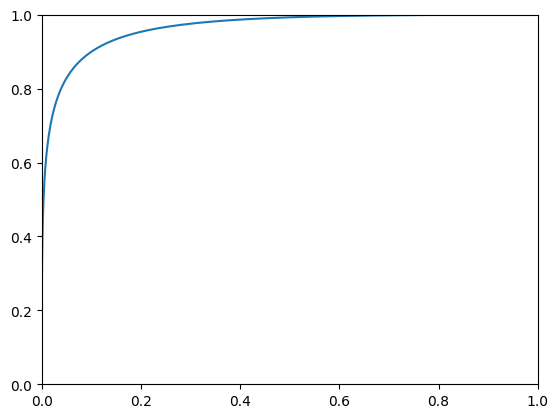

In [68]:
gammasROC = np.arange(-10, 30, 0.1)

alpha = np.zeros_like(gammasROC)
beta = np.zeros_like(gammasROC)

for k, gammaROC in enumerate(gammasROC):
        alpha[k] = stats.norm.sf((gammaROC - averageH0)/stdH0)
        beta[k] = stats.norm.cdf((gammaROC - averageH1)/stdH1)

plt.plot(alpha, 1- beta, label = 'ROC')
plt.xlim(0,1)
plt.ylim(0,1)

In [72]:
AUC = np.trapz(x = np.flip(alpha), y = np.flip(1 - beta))
print(f"Area under curve is {AUC}")

Area under curve is 0.9647584959983027


4. (5 points) What is the range of value for the threshold $\gamma$ such that the false negative probability is less than 15%?

In [75]:
gammaRange = []
for k, gamma in enumerate(gammasROC):
    if beta[k] < 0.15:
        gammaRange.append(gamma)


print(gammaRange[0], gammaRange[-1])

-10.0 11.399999999999924


# Problem 2 (25 pt)

This problem uses the Iris dataset from the UCI ML Repository and available with ```scikit-learn```.

Let's load the data:

In [76]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris(return_X_y=False)

#print(iris.DESCR)

This data set contains samples from 3 types of Iris plants: 0 (setosa), 1 (versicolor) and 2 (virginica):

In [77]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [85]:
df = pd.DataFrame(data=np.hstack((iris.data, iris.target[:,np.newaxis])), 
                 columns=np.hstack((iris.feature_names,'Class')))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Let's consider each iris flower to be characterized by its sepal length in cm.

Answer the following questions:

1. (4pt) Plot the histogram for the three types of iris flowers. Overlay the 3 histograms, add a legend and axis labels.
2. (6pt) Estimate the density function for each type of iris using Kernel Density Estimation (KDE) with a Gaussian kernel.
3. (4pt) In the same plot, plot the Gaussian KDE for each class along with each class histogram. Include legends and axis labels.
4. (6pt) Find the region of values (you may use ```x=np.linspace(3.6,9,1000)```) for which MLE will decide iris class 0 (setosa), 1 (versicolor) and 2 (virginica).
5. (5pt) Based on this decision rule, compute how many samples will be falsely classified as class 0 (setosa).

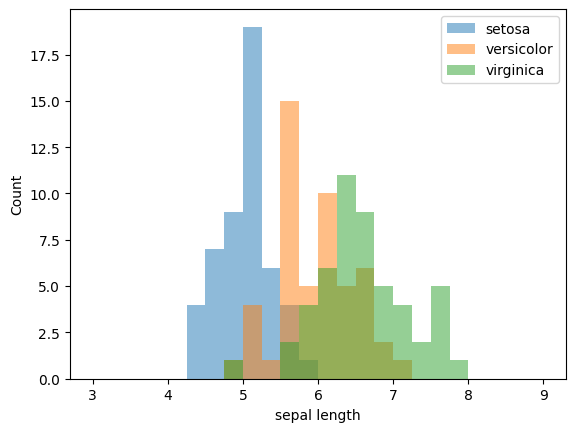

In [89]:
#1)
setosa = df.query('Class == 0')
versicolor = df.query('Class == 1')
virginica = df.query('Class == 2')

bins = np.linspace(3,9,25)

plt.hist(setosa['sepal length (cm)'], bins=bins, alpha = 0.5, label = 'setosa')
plt.hist(versicolor['sepal length (cm)'], bins=bins, alpha = 0.5, label = 'versicolor')
plt.hist(virginica['sepal length (cm)'], bins=bins, alpha = 0.5, label = 'virginica')

plt.xlabel('sepal length')
plt.ylabel('Count')



plt.legend()

In [101]:
#2)

setosaDensity = stats.gaussian_kde(setosa['sepal length (cm)'])
versicolorDensity = stats.gaussian_kde(versicolor['sepal length (cm)'])
virginicaDensity = stats.gaussian_kde(virginica['sepal length (cm)'])

print(f'setosa Density: {setosaDensity}')
print(f'versicolor Density: {versicolorDensity}')
print(f'virginica Density: {virginicaDensity}')

setosa Density: <scipy.stats._kde.gaussian_kde object at 0x0000026D90897F70>
versicolor Density: <scipy.stats._kde.gaussian_kde object at 0x0000026D90793DF0>
virginica Density: <scipy.stats._kde.gaussian_kde object at 0x0000026D90897CD0>


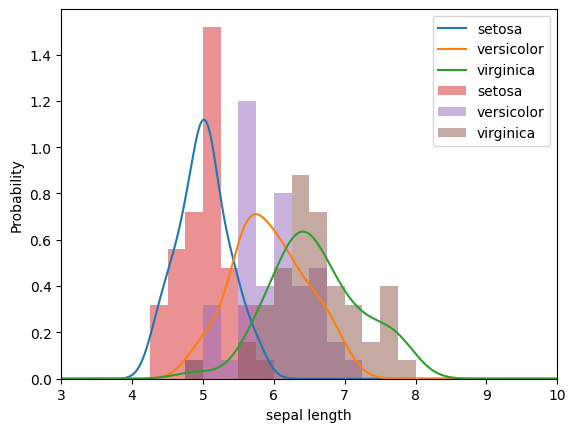

In [105]:
#3)
x = np.linspace(3, 10, 1000)
plt.plot(x, setosaDensity.pdf(x), label = 'setosa')
plt.plot(x, versicolorDensity.pdf(x), label = 'versicolor')
plt.plot(x, virginicaDensity.pdf(x), label = 'virginica')
bins = np.linspace(3,9,25)

plt.hist(setosa['sepal length (cm)'], bins=bins, alpha = 0.5, label = 'setosa', density = True)
plt.hist(versicolor['sepal length (cm)'], bins=bins, alpha = 0.5, label = 'versicolor',density = True)
plt.hist(virginica['sepal length (cm)'], bins=bins, alpha = 0.5, label = 'virginica',density = True)

plt.xlabel('sepal length')
plt.ylabel('Probability')
plt.xlim(3,10)

plt.legend()

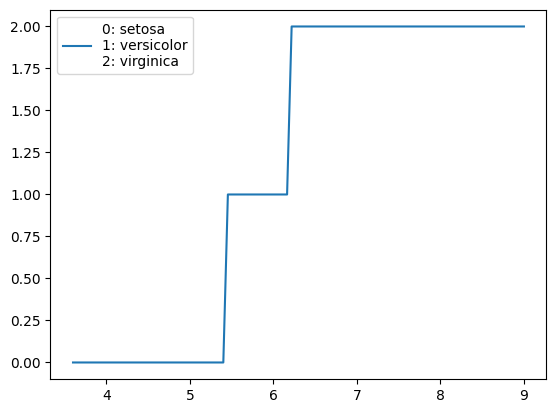

In [111]:
#4)
def MLEQuestion4(x, G0, G1, G2):
    return np.argmax([G0.pdf(x), G1.pdf(x), G2.pdf(x)])
xvalsRange = np.linspace(3.6, 9, 100)
results =  np.zeros_like(xvalsRange)
for k, x in enumerate(xvalsRange):
        result = MLEQuestion4(x, setosaDensity, versicolorDensity, virginicaDensity)
        results[k] = result
plt.plot(xvalsRange, results, label = '0: setosa\n1: versicolor\n2: virginica')
plt.legend()

In [112]:
#5)
count = 0
for k, row in df.iterrows():
    x = row['sepal length (cm)']
    result = MLEQuestion4(x, setosaDensity, versicolorDensity, virginicaDensity)
    if not(result == row['Class']) and result == 0:
            count += 1
print(f'Probability of falsely classifiying as setosa is: {count/len(df)}')

Probability of falsely classifiying as setosa is: 0.04666666666666667


# Problem 3 (20 pt)

Consider the following dataset:

[[ 3.03531993 -6.85668307]
 [ 2.04455059 -5.43379079]
 [ 2.57742831 -6.19344678]
 ...
 [ 2.5518855  -6.03259667]
 [ 2.85355628 -5.85326287]
 [ 2.23382494 -5.31600599]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

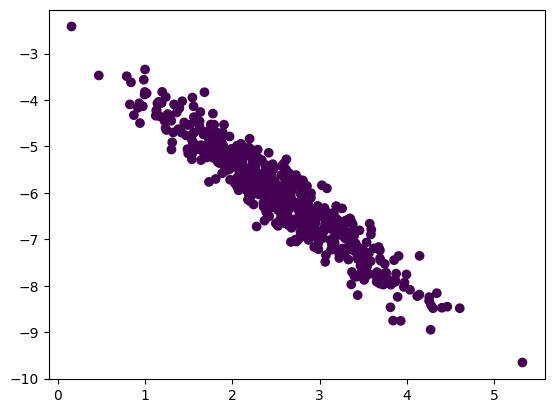

In [120]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=600,centers=1)
X = np.dot(X, [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]) 
plt.scatter(X[:,0],X[:,1],c=y);
print(X)
print(y)

Answering the following questions:
Each is 5 pt.
1. Compute the covariance matrix.

2. Compute the correlation coefficient using the formula.

3. Find the ad hoc linear regression (we learned this in lecture) solution using $x$ to predict $y$, what is the MSE  (mean squared error) of the  solution?

4. Plot the fitted linear function with the orginal dataset. 



In [116]:
#1)
covariance = np.cov(X.T)
print(covariance)

[[ 0.55611393 -0.7524928 ]
 [-0.7524928   1.14104673]]


In [118]:
#2)
correlationCoefficient = np.corrcoef(X.T)
print(correlationCoefficient)

[[ 1.         -0.94464525]
 [-0.94464525  1.        ]]


In [132]:
#3) using for Y = mx + b
m = covariance[1,0] / covariance[0,0]
b = X[:,1].mean() - m * X[:, 0].mean()

print(f'm is {m} and b is {b}')
print(f'Y = {m}*x + {b}')

m is -1.3531270466423144 and b is -2.610671812860595
Y = -1.3531270466423144*x + -2.610671812860595


(-10.0, 0.0)

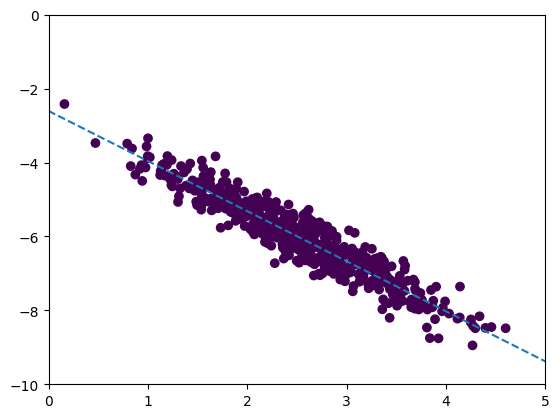

In [142]:
points = np.arange(-20, 20, 0.1)
plt.plot(points, m*points + b, '--')
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim(0,5)
plt.ylim(-10,0)

# Problem 4 (35pt)

Read about the California Housing data set included with scikit-learn: [Link to scikit-learn docs](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset:~:text=7.2.7.%20California-,Housing,-dataset%C2%B6)

You can import the data as follows:

In [143]:
from sklearn.datasets import fetch_california_housing
ca = fetch_california_housing()

**a.** (5pt) Use the `pd.DataFrame()` constructor to make a Pandas dataframe that contains the CA Housing data. Use the feature names from `ca['feature_names']` as the column names. Add a new column called 'MedHouseVal' containing the targets. Print out the first 5 rows of the dataframe.

In [146]:
#1)
df = pd.DataFrame(data = ca.data, columns = ca.feature_names)

df['MedHouseVal'] = ca.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


**b.** (2pt) Use Pandas to output the sample means of all of the features.

In [148]:
df.mean()

MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64

**c.** (2pt) In all of the following parts, interpret "feature" to include all of the columns of the dataframe you constructed. Use Pandas to display all of the covariances among the features.

In [149]:
df.cov()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,3.609323,-2.846140,1.536568,-0.055858,1.040098e+01,0.370289,-0.323860,-0.057765,1.508475
HouseAge,-2.846140,158.396260,-4.772882,-0.463718,-4.222271e+03,1.724298,0.300346,-2.728244,1.533988
AveRooms,1.536568,-4.772882,6.121533,0.993868,-2.023337e+02,-0.124689,0.562235,-0.136518,0.433826
AveBedrms,-0.055858,-0.463718,0.993868,0.224592,-3.552723e+01,-0.030424,0.070575,0.012670,-0.025539
Population,10.400979,-4222.270582,-202.333712,-35.527225,1.282470e+06,821.712002,-263.137814,226.377839,-32.212487
AveOccup,0.370289,1.724298,-0.124689,-0.030424,8.217120e+02,107.870026,0.052492,0.051519,-0.284494
Latitude,-0.323860,0.300346,0.562235,0.070575,-2.631378e+02,0.052492,4.562293,-3.957054,-0.355326
Longitude,-0.057765,-2.728244,-0.136518,0.012670,2.263778e+02,0.051519,-3.957054,4.014139,-0.106274
MedHouseVal,1.508475,1.533988,0.433826,-0.025539,-3.221249e+01,-0.284494,-0.355326,-0.106274,1.331615


**d.** (2pt) Which feature has the largest variance?

In [ ]:
#Population has the largest variance

**e.** (2pt) For which feature is the magnitude of the covariance with `MedHouseVal` the largest? Why do you think that is the case?

In [ ]:
#It is the highest with population because population has the largest individual variance

**f.** (2pt)  Use Pandas to display all of the correlation coefficients among the features.

In [150]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**g.** (5pt) Which feature has the largest correlation with `MedHouseVal`? 

Other then Medhouse val, MedInc has the highest correlation

**h.** (5pt) Make a scatter plot with `MedInc` as the explanatory variable and `MedHouseVal` as the response variable.

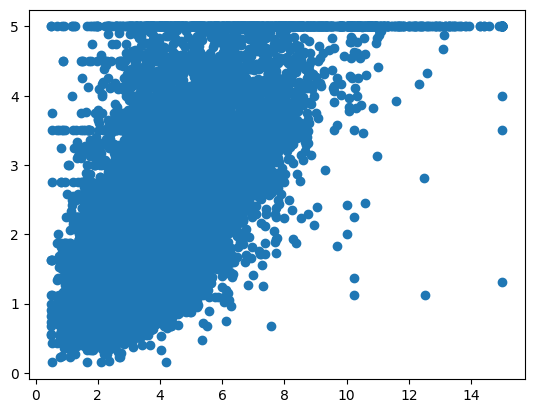

In [152]:
plt.scatter(df['MedInc'], df['MedHouseVal'])

**i.** (5pt) Without using `stats.linregress()`, calculate the slope and intercept of the simple linear regression line of fit.

In [155]:
cov = df.cov()
m = cov.loc['MedInc', 'MedHouseVal'] / df['MedInc'].var()
b = df['MedHouseVal'].mean() - m * df['MedInc'].mean()
print(f'Y = {m}*x + {b}')

Y = 0.4179384920189624*x + 0.4508557670326805


**j.**  (5pt) Use `stats.linregress()` to find the best line of fit. Plot the line on top of the scatter plot of the data.

(0.0, 15.0)

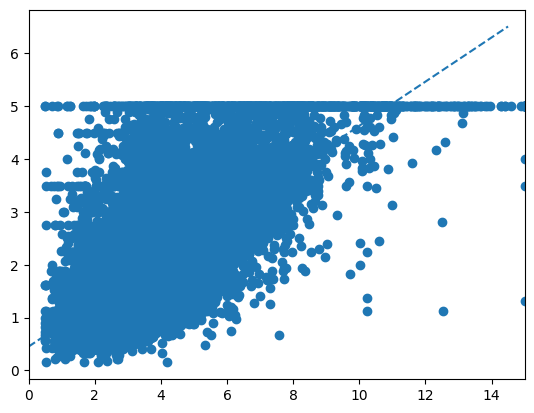

In [158]:
lob = stats.linregress(df['MedInc'], df['MedHouseVal'])
x = np.arange(0,15,0.5)
plt.scatter(df['MedInc'], df['MedHouseVal'])
plt.plot(x, lob.slope * x + lob.intercept, '--')
plt.xlim(0,15)